# Crear la base de datos



# A partir de su URL 
You can find the .zip file of a version [here](http://refractiveindex.info/download.php). For example, to load the version 2016-05-25:

In [13]:
%load_ext autoreload
%autoreload 2
# from rii_api import refractivesqlite as refractivesqlite
from . import rii_api
print(dir(rii_api.rii_api))
from refractivesqlite.refractivesqlite import dboperations as DB
import numpy as np
import matplotlib.pyplot as plt


dbpath = "refractive.db"
db = DB.Database(dbpath)
db.create_database_from_url(riiurl="http://refractiveindex.info/download/database/rii-database-2020-01-19.zip")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['__doc__', '__loader__', '__name__', '__package__', '__path__', '__spec__']
Database file not found.
Making request to http://refractiveindex.info/download/database/rii-database-2020-01-19.zip
Downloaded and extracting...
Wrote /database from http://refractiveindex.info/download/database/rii-database-2020-01-19.zip
LOG: 560,main,ZnS,Amotchkina : Bad Material YAML File.
***Wrote SQLite DB on  refractive.db


## Searches

### Search pages by term

In [38]:
# db.search_pages("otanicar")
# By exact term
indexes = db.search_pages('Quartz')
# By refractive interval
# db.search_n(n=0.3,delta_n=.0001)
# # Search materials by extinction coefficient (*k*) interval
# db.search_k(k=0.3,delta_k=.0001)
# # Search materials by *n,k* interval
# db.search_nk(n=0.3, delta_n=0.1,k=0.3,delta_k=0.1)
print(indexes)

1 results found.
pageid	shelf	book	page	filepath	hasrefractive	hasextinction	rangeMin	rangeMax	points
2752	3d	crystals	quartz	main/SiO2/Malitson.yml	1	0	0.21	6.7	100
[2752]


### Load material by Id

1 results found.
pageid	shelf	book	page	filepath	hasrefractive	hasextinction	rangeMin	rangeMax	points
2752	3d	crystals	quartz	main/SiO2/Malitson.yml	1	0	0.21	6.7	100
Material main/SiO2/Malitson.yml loaded.


Text(0.5, 1.0, 'Material:crystalsquartz')

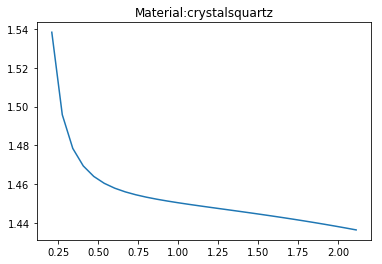

In [23]:
indexes = db.search_pages('Quartz')
mat = db.get_material(indexes[0])
h = mat.get_page_info()
ref_data = mat.get_complete_refractive()
wlen = np.array(ref_data)[:30,0]
n = np.array(ref_data)[:30,1]
plt.plot(wlen, n)
plt.title('Material:'+h['book']+h['page'])


### Get all material extinction coefficient data

In [22]:
ref_data = mat.get_complete_extinction()
# wlen = np.array(ref_data)[:30,0]
# k = np.array(ref_data)[:30,1]
# plt.plot(wlen, k)
# plt.title('Material:'+h['book']+h['page'])
print(ref_data)

None


### Get all material extinction coefficient data as a numpy array

In [24]:
import numpy as np
k = np.array(mat.get_complete_extinction())
print(k)

None


In [ ]:
## Materiales importantes para el proyecto

In [44]:
minerals = ['fluorite', 'analcime', 'orthoclase', 'microcline', 'albite (plagioclase)', 'oligoclase (plagioclase)', 'nepheline', 'cordierite', 
'andesine (plagioclase)', 'quartz', 'labradorite (plagioclase)', 'calcite', 'bytowonite (plagioclase)', 'muscovite', 'anorthite (plagioclase)',
'tremolite (amphibole)', 'anthophyllite (orthoamphibol e)', 'actinolite(amphibole)', 'apatite', 'andalusite', 'olivine', 'sillimanite',
'orthopyroxene', 'diopside-augiteclinopyroxene', 'spinel', 'kyanite', 'epidote', 'garnet', 'titanite', 'zircon', 'biotite', 'chlorite',
'actinolite (amphibole)', 'hornblende (amphibole)', 'clinopyroxene', 'orthopyroxene', 'spinel', 'epidote', 'aegirine (clinopyroxene)',
'tourmaline', 'epidote', 'staurolite', 'rutile', 'biotite', 'tourmaline', 'brown', 'amphibole', 'augite,', 'titanian (clinopyroxe ne)',
'spinel', 'garnet', '(melanite)', 'titanite', 'rutile', 'fluorite', 'glaucophane (amphibole)', 'tourmaline', 'Na amphiboles', 'garnet',
'orthopyroxene', 'hematite', 'andalusite', 'sericite', 'iddingsite', 'serpentine', 'uralite', 'leucoxene', 'limonite']


In [50]:
minerals[9]

'quartz'